## ML - Regression

This lesson will briefly introduce key ML concepts, and we'll then try to solve a regression problem.

Dataset comes from this link - https://www.kaggle.com/c/boston-housing

You can definition of each variable in the provided link.

![Boston dataset](Pictures/tiny-house-mini-motives-56a887b95f9b58b7d0f3184e.jpg)

In [1]:
## load library
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
## import dataset
Boston <- read.csv("Boston.csv")

In [3]:
## review dataset
glimpse(Boston)

Observations: 506
Variables: 14
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.088...
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5...
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87,...
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.5...
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.6...
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9...
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9...
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4,...
$ tax     <int> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311,...
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2,...
$ black   <dbl> 396.90, 396.90, 392.83, 394.63, 396.90, 394.12, 395.60, 396...
$ lstat   <dbl> 4.98

In [4]:
## TO DO - print firxt six rows

In [5]:
## any missing value
mean(complete.cases(Boston))

[1] 1

In [6]:
## TO DO - find mean and median of medv variable
mean(Boston$medv)

[1] 22.53281

In [7]:
## TO DO - create correalation matrix
## What are the top three features with high correlation to medv?
cor(Boston)[,14] %>% round(4) %>% abs() %>% sort(decreasing = T)

medv   lstat      rm ptratio   indus     tax     nox    crim     rad     age 
 1.0000  0.7377  0.6954  0.5078  0.4837  0.4685  0.4273  0.3883  0.3816  0.3770 
     zn   black     dis    chas 
 0.3604  0.3335  0.2499  0.1753

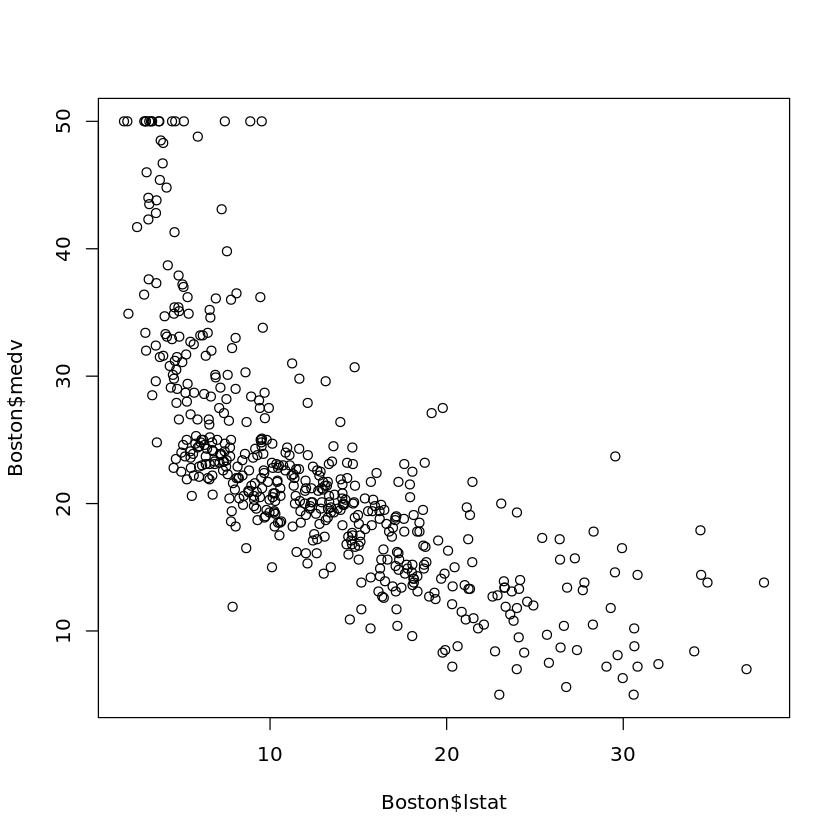

In [8]:
## plot scatterplot
plot(Boston$lstat, Boston$medv)

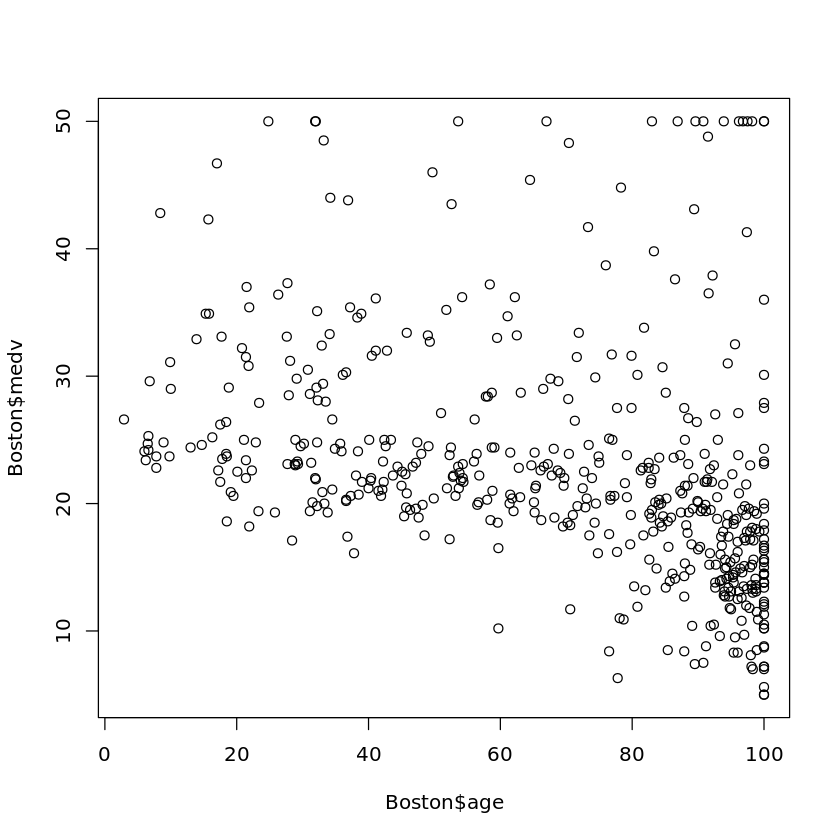

In [9]:
## plot scatterplot
plot(Boston$age, Boston$medv)

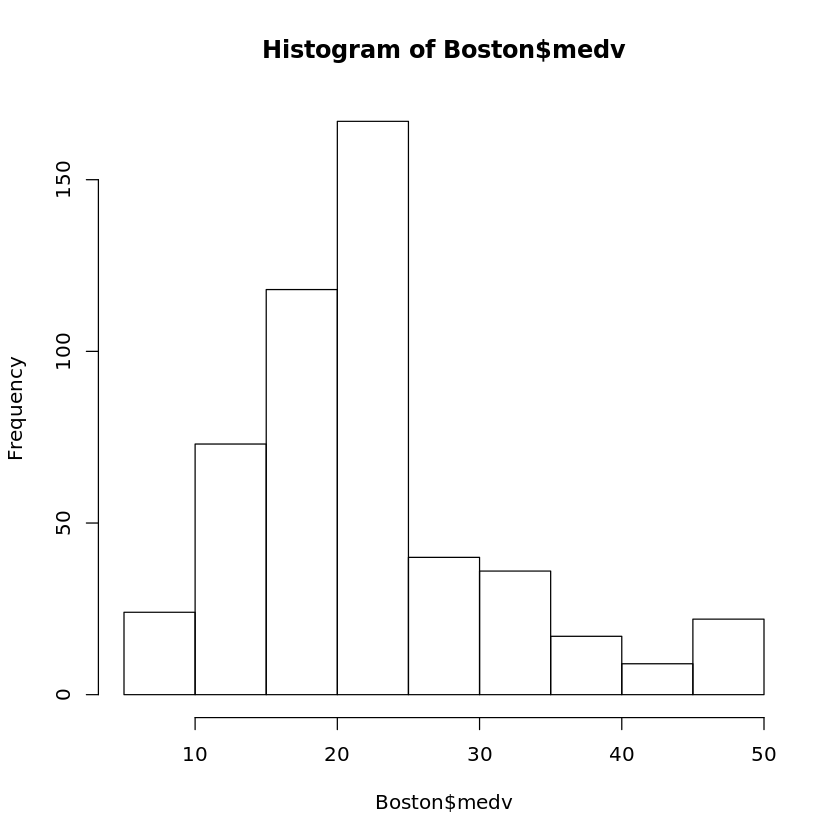

In [10]:
hist(Boston$medv)

## Steps to do ML

1. Prepare dataset
2. Split data into train and test
3. Train model
4. Test model
5. Deployment

In [11]:
## Split Data
set.seed(99)
n <- nrow(Boston)
id <- sample(1:n, 0.8*n, replace=FALSE)
train_df <- Boston[id, ]
test_df <- Boston[-id, ]

print(dim(train_df))
print(dim(test_df))

[1] 404  14
[1] 102  14


In [12]:
## Train Model
lm_model <- lm(medv ~ lstat + rm + ptratio, data = train_df)
print(lm_model)


Call:
lm(formula = medv ~ lstat + rm + ptratio, data = train_df)

Coefficients:
(Intercept)        lstat           rm      ptratio  
    19.9641      -0.6152       4.3342      -0.9016  



In [13]:
## Predict
train_p <- predict(lm_model)
print(train_p[1:10])

     296       58      345      500      269      485      336      147 
30.62434 33.46122 31.05246 17.50014 38.67528 18.99019 22.98873 20.85969 
     179       88 
30.47229 24.62106 


In [14]:
## Evaluate
mean(abs(train_p - train_df$medv)) %>% round(4)

[1] 3.6743

## Let's test our model with unseen dataset

In [15]:
## Predict
test_p <- predict(lm_model, newdata = test_df)

## Evaluate
mean(abs(test_p - test_df$medv)) %>% round(4)

[1] 3.8747

## Model Improvement

1. Collect more data
2. Add more variables

In [16]:
## Let's add more variables 
final_model <- lm(medv ~ ., data = train_df)
test_p <- predict(final_model, newdata = test_df)
mean(abs(test_p - test_df$medv)) %>% round(4)

[1] 3.4408

## A more powerful algorithm

Let's train a more powerful pokemon! NOPE! An algorithm :D

![Pokemon](Pictures/pokemon.jpg)

In [17]:
## run this code only once
install.packages("randomForest")

Warning message in install.packages("randomForest"):
“installation of package ‘randomForest’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [18]:
## call library
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine



In [19]:
## read help file
help(randomForest)

In [20]:
## train model
set.seed(99)
rf_model <- randomForest(medv ~ ., data = train_df, ntree = 1000)

In [21]:
## test model
test_p <- predict(rf_model, newdata = test_df)
mean(abs(test_p - test_df$medv)) %>% round(4)

[1] 2.2191

#### Summary

In this tutorial, we learn how to build a ML model. It's actually really easy in R and can be done in few steps.

1. Prepare dataset
2. Split data into train/ test
3. Train model
4. Test model
5. Deployment (this is more like a software engineer work)